# Description of the project

## Introduction

This project is devoted to the question-answering task. You are going to work with the **BoolQ** dataset from SuperGLUE.

BoolQ is a question answering dataset for yes/no.

Each example is a triplet of (question, passage, answer), with the title of the page as optional additional context. The dataset release consists of three `.jsonl` files (`train, val, test`), where each line is a JSON dictionary with the following format:

    Example:
    
    {
      "question": "is france the same timezone as the uk",
      "passage": "At the Liberation of France in the summer of 1944, Metropolitan France kept GMT+2 as it was the time then used by the Allies (British Double Summer Time). In the winter of 1944--1945, Metropolitan France switched to GMT+1, same as in the United Kingdom, and switched again to GMT+2 in April 1945 like its British ally. In September 1945, Metropolitan France returned to GMT+1 (pre-war summer time), which the British had already done in July 1945. Metropolitan France was officially scheduled to return to GMT+0 on November 18, 1945 (the British returned to GMT+0 in on October 7, 1945), but the French government canceled the decision on November 5, 1945, and GMT+1 has since then remained the official time of Metropolitan France."
      "label": false,
      "idx": 123,
    }

For this project you will need only `train` and `val` parts.

Dataset is available here: https://dl.fbaipublicfiles.com/glue/superglue/data/v2/BoolQ.zip

Detailed task description is available here: https://arxiv.org/abs/1905.10044

## Bonus for those, who want to work with Russian

For those who want to work with Russian data there is an option to use **DaNetQA** dataset (instead of BoolQ) from Russsian SuperGLUE. The dataset is organised similarly to BoolQ.

You may download data from here: https://russiansuperglue.com/tasks/download/DaNetQA

Detailed task description is available here: https://arxiv.org/abs/2010.02605


**Note:** note that you should take only one dataset (either BoolQ or DanetQA). There are no bonus points for solving both tasks.


## Detailed Task Description

In the task you should perform all the model training on `train.jsonl` data and evaluate your models on `val.jsonl`. Note that you do not need `test.jsonl`.

Use **accuracy metric** for scoring.

The solution of either BoolQ or DaNetQA should include:


### 1. Data analysis


* 1.1 Download the data and calculate basic statistics (example number, class distribution, mean sentence length, number of unique words, etc.) and make visualizations, if necessary.


### 2. Pretrained embeddings as features for classifier
* 2.1 Take pre-trained word2vec or fastText embeddings and vectorize your data using them.

**Note:** you may use any pre-trained embeddings available on the Internet. For example, for English you may take GoogleNews vectors, which are available here: https://www.kaggle.com/leadbest/googlenewsvectorsnegative300 . For the Russian language you may choose one of the models from RusVectores (https://rusvectores.org/ru/models/).

* 2.2 Use pretrained embeddings as features to a classifier. Train SVM, Linear Regression or any other classification model. Describe and analyze your results (use accuracy metric and data from `val.jsonl` for evaluation of your results).

* 2.3 Instead of word2vec or fastText embeddings get BERT embeddings from the train dataset and vectorize your data.

**Note:** you may use any of the BERT-like models from hugging face (https://huggingface.co/) library. For example, you may use `bert-base-multilingual-cased` (https://huggingface.co/bert-base-multilingual-cased).

* 2.4 Similarly to 2.1, train SVM, Linear Regression or any other classification model using BERT embeddings as features for a classifier. Describe and analyze your results (use accuracy metric and data from `val.jsonl` for evaluation of your results).


### 3. Fine-tune BERT

* 3.1 Split the data from `train.jsonl` into train and dev (dev_size = 10%) . Tokenize and format the data (do not forget about the [SEP] token).

* 3.2 Initialize the model, optimizer and learning rate scheduler. Explain your choice of the parameters.

* 3.3 Write a training loop and fine-tune BERT. Do not forget about evaluation on dev set created in 3.1.

**Note:** you may use one of the tutorials for fine-tuning BERT, but you have to provide a link to it. For example, you may use this one: https://mccormickml.com/2019/07/22/BERT-fine-tuning/

* 3.4 Make predictions for the test data (from `val.jsonl`),  and analyze the results (use accuracy metric for scoring).



### 4. Summary & results analysis


* 4.1 Compare the results of all the tested models and try to interpret them.

* 4.2 Propose, how you may improve the model score (write at least three ideas).


### General Requirements

* You should provide a solution in the form of the Jupyter Notebook with code cells and markdown cells (with text)
* Make sure that the instructor can run all the cells to reproduce your results
* Clearly answer each question, perform the required actions from the task. Explain your decisions if you choose to use some techniques
* Provide links to the tutorials you use for reference.


# Solution

### 1. Data analysis

1.1  Download the data and calculate basic statistics (example number, class distribution, mean sentence length, number of unique words, etc.) and make visualizations, if necessary.

In [ ]:
!pip install wget -q

  Preparing metadata (setup.py) ... done


In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/NLP_FP/BoolQ/'

In [ ]:
import os

if not os.path.exists(data_path):
  print("Download dataset")

  # The URL for the dataset zip file.
  url = 'https://dl.fbaipublicfiles.com/glue/superglue/data/v2/BoolQ.zip'

  # Download the file (if we haven't already)
  if not os.path.exists('/content/drive/MyDrive/NLP_FP/BoolQ'):
    wget.download(url, './BoolQ.zip')

  # Unzip the dataset (if we haven't already)
  if not os.path.exists('./BoolQ/'):
          !unzip BoolQ.zip
  data_path = './BoolQ/'

We'll use pandas to parse the training and validation sets and look at a few of their properties and data points.

In [ ]:
# Load the dataset into a pandas dataframe.
df_train = pd.read_json(f'{data_path}train.jsonl', lines=True)
df_val = pd.read_json(f'{data_path}val.jsonl', lines=True)

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df_train.shape[0]))
print('Number of validation sentences: {:,}\n'.format(df_val.shape[0]))

# Display 10 random rows from the data.
df_train.sample(10)

Number of training sentences: 9,427

Number of validation sentences: 3,270



,question,passage,idx,label
606,is it legal to count cards in vegas,Card counting -- Card counting is not illegal ...,606,True
4531,are goats and sheep in the same family,Sheep–goat hybrid -- A sheep--goat hybrid (cal...,4531,True
8511,is wentworth prison based on a true story,"Wentworth (TV series) -- In March 2012, it was...",8511,False
5492,is the st louis arch a national monument,Gateway Arch National Park -- The Gateway Arch...,5492,True
1991,is it possible to have more than one citizenship,"Multiple citizenship -- Multiple citizenship, ...",1991,True
5686,can you have joint tenancy without right survi...,Concurrent estate -- A concurrent estate or co...,5686,False
4352,is the esophagus part of the digestive tract,"Human digestive system -- Chewing, in which fo...",4352,True
2408,does the duck die in peter and the wolf,Peter and the Wolf -- Peter's grandfather scol...,2408,True
910,will there be a season two of punisher,The Punisher (season 2) -- The second season o...,910,True
3378,in private practice does addison have a baby,Addison Montgomery -- At the beginning of seas...,3378,True


As we can see from the training dataset sample above, feature `idx` repeats the dataframe index, thus we will drop `idx` for both datasets.

In [ ]:
df_train.drop(columns='idx', inplace=True)
df_val.drop(columns='idx', inplace=True)

Let us check that there are not any NaNs in the dataset (just in case).

In [ ]:
print('Are features without NaNs?')
print(f'\nTraining dataset:')
display(df_train.notna().all())

print(f'\nValidation dataset:')
display(df_val.notna().all())

Are features without NaNs?

Training dataset:


question    True
passage     True
label       True
dtype: bool


Validation dataset:


question    True
passage     True
label       True
dtype: bool

Let us check train dataset for presence of duplicated rows (just in case).

In [ ]:
duplicated_rows = df_train[df_train.columns[:-1]].duplicated()
any_duplicates = duplicated_rows.any()
if any_duplicates:
  print('Number of duplicated rows:', df_train[duplicated_rows].shape[0] )
  print('Duplicated Rows:')
  display(df_train[duplicated_rows][:3])
else:
  print('There are not any duplicates.')

There are not any duplicates.


Let us evaluate class distribution for the `label` feature

In [ ]:
import matplotlib.pyplot as plt

def plot_bar(data: pd.DataFrame):
  print(f"Proportion of classes in '{data.name}', %:",
  f"\n{data.value_counts(normalize=True).apply(lambda x: round(x * 100, 1))}")
  plt.figure(figsize=(5, 3))
  data.value_counts().plot(kind='bar', edgecolor='black', zorder=2);
  plt.xticks(rotation=0)
  plt.grid(zorder=0)
  plt.title(f'Class distribution of "{data.name}" feature');

Proportion of classes in 'label', %: 
True     62.3
False    37.7
Name: label, dtype: float64


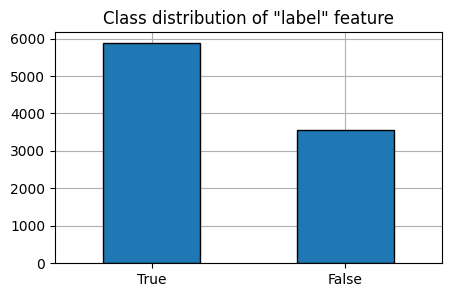

In [ ]:
plot_bar(df_train['label'])

From above we see that classes of the answers are slightly imbalanced.

Let us calculate mean question and passage lengths in characters:

In [ ]:
for feature in ['question', 'passage']:
  len_in_chars = df_train[feature].apply(len)
  print(f'An average {feature} consists of {round(len_in_chars.mean())}  characters, including punctuation.')

An average question consists of 44  characters, including punctuation.
An average passage consists of 590  characters, including punctuation.


Let us calculate mean sentence length in words:

In [ ]:
import re

def remove_punctuation(text: str):
  '''
  This function is used to remove punctuation from lowercased sentences
  '''
  return re.sub(r'[^\w\s]', '', text.lower())

In [ ]:
for feature in ['question', 'passage']:
  len_in_words = df_train[feature].apply(lambda x: (len(remove_punctuation(x).split())))
  print(f'Info about "{feature}":')
  # Print length of the shortest
  print(f'The shortest - {round(len_in_words.min())} words;')
  # Print length of an average
  print(f'An  average  - {round(len_in_words.mean())} words;')
  # Print length of the longest
  print(f'The longest  - {round(len_in_words.max())} words.\n')

Info about "question":
The shortest - 4 words;
An  average  - 9 words;
The longest  - 21 words.

Info about "passage":
The shortest - 10 words;
An  average  - 96 words;
The longest  - 757 words.



**Number of unique words**

To calculate the number of unique words used in the training dataset (for `question` and  `passage` separately) we will perform the following steps:
- make each word in a sentence lower case;
- remove punctuation from each sentence (type: str);
- split each sentence (type: str) into a list by space;
- convert each sentence (type: list) into a set to drop duplicates;
- union all sets obtained above into a final set;
- calculate the length of the final set.

In [ ]:
def make_set(line: str):
  '''
  Remove punctuation, split into words and
  return unique words only
  '''
  line = remove_punctuation(line)
  return set(line.split())

def get_final_set(data):
  '''
  Create a final set from subsets of unique words
  '''
  word_sets = data.apply(lambda x: make_set(x))
  final_set = set(word_sets.explode().values)
  return final_set

Compute number of unique words

In [ ]:
for feature in ['question', 'passage']:
  final_set = get_final_set(df_train[feature])
  print(f'\nInfo about "{feature}":')
  print('Excerpt from the final set of unique words:', end=' ')
  print(*sorted(final_set)[9000:9003], sep=', ', end='.\n')
  print(f'Number of unique words in "{feature}"\
 feature of the training dataset: ', len(final_set), end='.\n')


Info about "question":
Excerpt from the final set of unique words: wives, wizard, wizards.
Number of unique words in "question" feature of the training dataset:  9141.

Info about "passage":
Excerpt from the final set of unique words: carryon, carré, cars.
Number of unique words in "passage" feature of the training dataset:  48793.


### 2. Pretrained embeddings as features for classifier

#### 2.1 Pre-trained word2vec embeddings for data vectorization

Load word2vec model using `gensim.models.KeyedVectors.load_word2vec_format`.

In [ ]:
!python -m pip install --quiet --upgrade gensim

In [ ]:
# CODE FOR DOWNLOADING PRETRAINED MODEL
path_COLAB = '/content/drive/MyDrive/Colab_Notebooks/GoogleNews-vectors-negative300.bin.gz'
if not os.path.exists(path_COLAB):
  !wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz" -q
  !wget -O GoogleNews-vectors-negative300.bin.gz "drive.google.com/u/3/uc?id=1pPPHMNjJAb82-xYFFJLz_kqcnNhmwAhW&export=download&confirm=yes" -q

In [ ]:
from gensim import models

word2vec = models.KeyedVectors.load_word2vec_format(path_COLAB, binary=True)  # C bin format

Let us print some examples of words.

In [ ]:
print(list(word2vec.key_to_index.keys())[15:25])

['it', 'be', 'from', 'by', 'are', 'I', 'have', 'he', 'will', 'has']


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
  '''
  Remove stopwords from list of words
  '''
  return [word for word in text if word not in STOPWORDS]

In [ ]:
def get_tokens(text):
  '''
  From raw text get tokenized list,
  without punctuatiion marks and stopwords
  '''
  tokenized_text = remove_punctuation(text).split()
  tokenized_text = remove_stopwords(tokenized_text)
  return tokenized_text

To vectorize tokenized text, we will:
 * get word embeddings by embedding model downloaded above;
 * use *pooling* strategy that define the way to aggregate the embeddings of each word in a text by taking an element-wise **averaging**.

Thus, we will implement `MeanEmbeddingVectorizer` class.

**Note**: Implementation of the `MeanEmbeddingVectorizer` class is based on the Programming assignment of Week 2 of the Natural language processing course.


In [ ]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = self.word2vec['the'].shape[0]

    def fit(self, X, y):
        return self

    def transform(self, X):
      # X is a list of tokenized sentences
        # example:
        # X = [['the','cat,'sat','on','the','mat'],
        #      ['the','dog,'lies','on','the','sofa']]

        return np.array([
            np.mean([self.word2vec[word] for word in words if word in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [ ]:
from tqdm.notebook import tqdm

In the next cell we will perform tokenization of `question` and `passage` features for both datasets (`df_train`, `df_val`).

In [ ]:
for feature in ['question', 'passage']:
  tqdm.pandas(desc=f'Processing the "{feature}" column')

  df_train[f'{feature}_tokenized'] = df_train[feature].progress_apply(lambda text:
                                                                get_tokens(text=text))

  df_val[f'{feature}_tokenized'] = df_val[feature].progress_apply(lambda text:
                                                                get_tokens(text=text))


Processing the "question" column:   0%|          | 0/9427 [00:00<?, ?it/s]

Processing the "question" column:   0%|          | 0/3270 [00:00<?, ?it/s]

Processing the "passage" column:   0%|          | 0/9427 [00:00<?, ?it/s]

Processing the "passage" column:   0%|          | 0/3270 [00:00<?, ?it/s]

So, after tokenization we got.

In [ ]:
df_val.head()

,question,passage,label,question_tokenized,passage_tokenized
0,does ethanol take more energy make that produces,Ethanol fuel -- All biomass goes through at le...,False,"[ethanol, take, energy, make, produces]","[ethanol, fuel, biomass, goes, least, steps, n..."
1,is house tax and property tax are same,Property tax -- Property tax or 'house tax' is...,True,"[house, tax, property, tax]","[property, tax, property, tax, house, tax, loc..."
2,is pain experienced in a missing body part or ...,Phantom pain -- Phantom pain sensations are de...,True,"[pain, experienced, missing, body, part, paral...","[phantom, pain, phantom, pain, sensations, des..."
3,is harry potter and the escape from gringotts ...,Harry Potter and the Escape from Gringotts -- ...,True,"[harry, potter, escape, gringotts, roller, coa...","[harry, potter, escape, gringotts, harry, pott..."
4,is there a difference between hydroxyzine hcl ...,Hydroxyzine -- Hydroxyzine preparations requir...,True,"[difference, hydroxyzine, hcl, hydroxyzine, pam]","[hydroxyzine, hydroxyzine, preparations, requi..."


Vectorization process will be performed as follows:
- vectorize previously tokenized features `question` and `passage` separately
as a result for each single `question` and `passage` we will get a sentence vector (since we use averaging pooling technique);
- get a sum of obtained sentence vectors.

**Note**: There are many other techiques for pooling word vectors (sum, min, max) and concatenation of sentence vectors (mean, etc).


In [ ]:
vectorizer = MeanEmbeddingVectorizer(word2vec=word2vec)
X_train = vectorizer.transform(df_train['question_tokenized']) + vectorizer.transform(df_train['passage_tokenized'])
X_val   = vectorizer.transform(df_val['question_tokenized']) + vectorizer.transform(df_val['passage_tokenized'])

For feature `label` of both datasets let us convert boolean `True` and `False` into zero and one, taking into account that:
```python
int(True) = 1, int(False) = 0
```

In [ ]:
y_train = df_train['label'].map(int).values
y_val = df_val['label'].map(int).values
y_train

array([1, 1, 1, ..., 1, 0, 0])

#### 2.2 Train SVM, using pretrained embeddings as features to a classifier.

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

classifier = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale',
    coef0=0.0, shrinking=True, probability=False,
    tol=0.001, cache_size=200, class_weight=None,
    verbose=False, max_iter=-1, decision_function_shape='ovr',
    break_ties=False, random_state=42)

Learn a model.

In [ ]:
classifier.fit(X_train, y_train)

SVC(random_state=42)

Get predictions on the data from `val.jsonl` and calculate accuracy.

In [ ]:
pred = classifier.predict(X_val)
accuracy = accuracy_score(y_val, pred)
accuracy

0.6382262996941896

As we can see accuracy score is almost 0.64. It is necessary to notice that in the [paper](https://arxiv.org/abs/1905.10044) on which the task is based, the authors said that for the `BoolQ` dataset accuracy of `62% is majority-baseline`.
Thus, the result we obtained is quite good.

#### 2.3 Usage of BERT to get embeddings from the train dataset and data vectorization

This section is based on the Programming assignment of Week 5 of the Natural language processing course.

In [ ]:
!pip install transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.6 MB/s eta 0:00:00


Download tokenizer and the model from `Hugging Face`

In [ ]:
import torch
from transformers import BertTokenizer, BertModel, BertForMaskedLM
from torch.nn import functional as F

import logging
logging.basicConfig(level=logging.INFO)

# Load pre-trained model tokenizer (vocabulary)
base_model = "bert-base-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(base_model)

In the next cells we will implement several functions to meet the BERT's requirements.

In [ ]:
from torch.nn.modules import padding

def bert_text_preparation(text, tokenizer):
    """Preparing the input for BERT
    Takes a string argument and performs
    pre-processing like adding special tokens,
    tokenization, tokens to ids, and tokens to
    segment ids. All tokens are mapped to seg-
    ment id = 1.
    OUTPUT:  input_ids': tensor([[ 101, 3086, 2003, 2035, 2017, 2342, 1012,  102]]),
    'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]),
    'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
    (['[CLS]', 'attention', 'is', 'all', 'you', 'need', '.', '[SEP]'],
    """
    input_ids, token_type_ids, attention_mask = tokenizer(text, add_special_tokens = True,
                                                          truncation = True, padding = False,
                                                          return_attention_mask = True,
                                                          return_tensors = "pt").values()
    tokenized_text = tokenizer.convert_ids_to_tokens(input_ids.tolist()[0])
    return tokenized_text, input_ids, token_type_ids, attention_mask

text = "Attention is all you need."
tokenized_text, input_ids, token_type_ids, attention_mask = bert_text_preparation(text, tokenizer)
print(tokenized_text)
print(input_ids)

['[CLS]', 'At', '##tention', 'is', 'all', 'you', 'need', '.', '[SEP]']
tensor([[  101, 11699, 65587, 10124, 10435, 13028, 17367,   119,   102]])


In [ ]:
def get_bert_embeddings(tokens_tensor, segments_tensors, model):
    """Get embeddings from an embedding model
    Args:
        tokens_tensor (obj): Torch tensor size [n_tokens]
            with token ids for each token in text
        segments_tensors (obj): Torch tensor size [n_tokens]
            with segment ids for each token in text
        model (obj): Embedding model to generate embeddings
            from token and segment ids

    Returns: [n_tokens, n_embedding_dimensions]
    containing embeddings for each token
    """
    # Gradient calculation id disabled
    # Model is in inference mode
    with torch.no_grad():
        outputs = model(tokens_tensor, segments_tensors)
        # Removing the first hidden state
        # The first state is the input state
        hidden_states = outputs[2][1:]

    # Getting embeddings from the final BERT layer
    token_embeddings = hidden_states[-1]
    # Collapsing the tensor into 1-dimension
    token_embeddings = torch.squeeze(token_embeddings, dim=0)
    # Converting torchtensors to lists
    list_token_embeddings = [token_embed.tolist() for token_embed in token_embeddings]

    return list_token_embeddings

In [ ]:
bert_model = BertModel.from_pretrained("bert-base-multilingual-cased",
                                       output_hidden_states=True)
# Put the model in "evaluation" mode, meaning feed-forward operation.
bert_model = bert_model.eval()

In [ ]:
def get_sentence_embedding(text, bert_model):

    input_ids, token_type_ids, attention_mask = tokenizer(text, add_special_tokens = True,
                                                          truncation = True, padding = True,
                                                          return_attention_mask = True,
                                                          return_tensors = "pt").values()
    tokenized_text = tokenizer.convert_ids_to_tokens(input_ids.tolist()[0])

    sentence_embedding = bert_model(input_ids,
                                       attention_mask=attention_mask,
                                       token_type_ids=token_type_ids)


    return sentence_embedding.last_hidden_state[:, 0, :].detach().numpy()

In [ ]:
X_train_question = df_train['question'].values
X_train_passage = df_train['passage'].values
X_train = []

Obtain the `X_train` dataset as follows:
- get sentence embeddings (via BERT) for each single `question` and `passage`;
- get a sum of obtained sentence vectors.

In [ ]:
for i in tqdm(range(X_train_question.shape[0])):
    question_embedding = get_sentence_embedding(X_train_question[i], bert_model)
    passage_embedding = get_sentence_embedding(X_train_passage[i], bert_model)
    X_train.extend(question_embedding + passage_embedding)

  0%|          | 0/9427 [00:00<?, ?it/s]

Since calculations of the sentence embeddings took a while, let us save `X_train` and `X_val` at local disk for futher usage.

In [ ]:
from google.colab import files

def save_download(data, file):
  '''
  Function to save data at local disk
  '''
  with open(file, 'wb') as f: # save data at Colab
    np.save(f, data)
  with open(file, 'rb') as f:
    data_copy = np.load(f)    # read data from Colab
  if (data_copy == data).all(): # if initial data == saved at Colab data, download the data file
    files.download(file)
    print(f'File {file} saved at local disk')

In [ ]:
save_download(X_train, 'X_train.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File X_train.npy saved at local disk


In [ ]:
X_val_question = df_val['question'].values
X_val_passage = df_val['passage'].values
X_val = []

In [ ]:
for i in tqdm(range(X_val_question.shape[0])):
      question_embedding = get_sentence_embedding(X_val_question[i], bert_model)
      passage_embedding = get_sentence_embedding(X_val_passage[i], bert_model)
      X_val.extend(question_embedding + passage_embedding)

  0%|          | 0/3270 [00:00<?, ?it/s]

In [ ]:
save_download(X_val, 'X_val.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File X_val.npy saved at local disk


In [ ]:
with open('/content/drive/MyDrive/NLP_FP/X_train.npy', 'rb') as f:
    X_train = np.load(f)

In [ ]:
with open('/content/drive/MyDrive/NLP_FP/X_val.npy', 'rb') as f:
    X_val = np.load(f)

#### 2.4 Train SVM, using BERT embeddings as features to a classifier.

In [ ]:
classifier = svm.SVC(C=0.5, kernel='rbf', degree=3, gamma='scale',
    coef0=0.0, shrinking=True, probability=False,
    tol=0.001, cache_size=200, class_weight=None,
    verbose=True, max_iter=-1, decision_function_shape='ovr',
    break_ties=False, random_state=42)

In [ ]:
classifier.fit(X_train, y_train)

[LibSVM]

SVC(C=0.5, random_state=42, verbose=True)

In [ ]:
pred = classifier.predict(X_val)
accuracy = accuracy_score(y_val, pred)
accuracy

0.6217125382262997

As we can see accuracy score is slightly over 0.62. It is necessary to notice that in the [paper](https://arxiv.org/abs/1905.10044) on which the task is based, the authors said that for the `BoolQ` dataset accuracy of `62% is majority-baseline`.
Thus, the result we obtained is quite good.

### 3. Fine-tune BERT

#### 3.1 Split the data from `train.jsonl` into train and dev (dev_size = 10%)



In [ ]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 11.2 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModelForMaskedLM
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader
from datasets import Dataset

from tqdm.auto import tqdm, trange

from torch.optim import Adam

from sklearn.model_selection import train_test_split

In [ ]:
df_train = pd.read_json(f'{data_path}train.jsonl', lines=True)
df_val = pd.read_json(f'{data_path}val.jsonl', lines=True)

In [ ]:
df_train.question.iloc[0] + '? ' + df_train.passage.iloc[0]

'do iran and afghanistan speak the same language? Persian language -- Persian (/ˈpɜːrʒən, -ʃən/), also known by its endonym Farsi (فارسی fārsi (fɒːɾˈsiː) ( listen)), is one of the Western Iranian languages within the Indo-Iranian branch of the Indo-European language family. It is primarily spoken in Iran, Afghanistan (officially known as Dari since 1958), and Tajikistan (officially known as Tajiki since the Soviet era), and some other regions which historically were Persianate societies and considered part of Greater Iran. It is written in the Persian alphabet, a modified variant of the Arabic script, which itself evolved from the Aramaic alphabet.'

In [ ]:
df_train['label'] = df_train['label'].map(int)
df_val['label'] = df_val['label'].map(int)

In [ ]:
data = Dataset.from_dict({'text': df_train['question'] + '? ' + df_train['passage'],
                          'label': df_train['label']}).train_test_split(test_size=0.1, seed=42)
data_val = Dataset.from_dict({'text': df_val['question'] + '? ' + df_val['passage'],
                              'label': df_val['label']})
data, data_val

(DatasetDict({
     train: Dataset({
         features: ['text', 'label'],
         num_rows: 8484
     })
     test: Dataset({
         features: ['text', 'label'],
         num_rows: 943
     })
 }),
 Dataset({
     features: ['text', 'label'],
     num_rows: 3270
 }))

Tokenization and formatting of the data.

In [ ]:
base_model = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(base_model)

In [ ]:
data_tokenized = data.map(lambda x: tokenizer(x['text'], truncation=True, max_length=512), batched=True, remove_columns=['text'])
data_val_tokenized = data_val.map(lambda x: tokenizer(x['text'], truncation=True, max_length=512), batched=True, remove_columns=['text'])

Map:   0%|          | 0/8484 [00:00<?, ? examples/s]

Map:   0%|          | 0/943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3270 [00:00<?, ? examples/s]

In [ ]:
data_tokenized

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 8484
    })
    test: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 943
    })
})

In [ ]:
print(data_tokenized['train'][0])

{'label': 1, 'input_ids': [101, 10149, 11178, 10108, 10105, 11364, 10107, 10128, 10106, 10105, 11364, 10107, 136, 19762, 44230, 10107, 113, 10117, 44230, 104957, 114, 118, 118, 10357, 10124, 15875, 10106, 10105, 11226, 124, 14320, 100, 100, 10117, 30109, 10108, 11340, 112, 112, 117, 10841, 17399, 117, 22342, 10111, 16975, 32099, 10957, 117, 56294, 10189, 10271, 11337, 32099, 10435, 10108, 10105, 98851, 10850, 10114, 10455, 100, 100, 37947, 112, 112, 14042, 119, 12209, 117, 21350, 75923, 10114, 15031, 45059, 10708, 10119, 43995, 10230, 10105, 92478, 47641, 11360, 37051, 10124, 15875, 119, 10377, 10124, 23127, 11222, 37051, 112, 187, 12557, 10189, 10841, 10151, 19762, 15229, 117, 10435, 10321, 35407, 11234, 10108, 10226, 10345, 10485, 24911, 12953, 10128, 10146, 11206, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
train_dataloader = DataLoader(data_tokenized['train'], shuffle=True, batch_size=4, collate_fn=collator)
val_dataloader = DataLoader(data_tokenized['test'], shuffle=False, batch_size=4, collate_fn=collator)
test_dataloader = DataLoader(data_val_tokenized, shuffle=False, batch_size=4, collate_fn=collator)

#### 3.2  Initialize the model, optimizer and learning rate scheduler

Since we have only two options to choose for the answer: `Yes` or `No` - we will set parameter of the model `num_labels=2`.

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(base_model, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
type(model)

transformers.models.bert.modeling_bert.BertForSequenceClassification

In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [ ]:
if torch.cuda.is_available():
    model.cuda()

As it was said on the last webinar (conserning BERT), Adam optimizer is an industry standard for NLP tasks.

In [ ]:
optimizer = Adam(model.parameters(), lr=1e-6)  # with tiny batches, LR should be very small as well

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

#### 3.3 Training loop and fine-tune BERT

By trials and errors method we found out that after the 5-th epoch the model is tend to overfitting: training loss decreasing while validation loss increasing.
Thus, for final fine-tuning we used 5 epochs for the training.

In [ ]:
EPOCHS = 5
losses = []
for epoch in trange(EPOCHS, desc=f"Traning Model on {EPOCHS} Epochs"):
    pbar = tqdm(train_dataloader)
    model.train()
    for i, batch in enumerate(pbar):
        out = model(**batch.to(model.device))
        out.loss.backward()
        if i % 1 == 0:
            optimizer.step()
            optimizer.zero_grad()
        losses.append(out.loss.item())
        pbar.set_description(f'Epoch {epoch + 1}/{EPOCHS}, loss: {np.mean(losses[-100:]):2.2f}')
    model.eval()
    eval_losses = []
    eval_preds = []
    eval_targets = []
    for batch in tqdm(val_dataloader, desc=f'Validation phase  {epoch + 1}/{EPOCHS}'):
        with torch.no_grad():
                out = model(**batch.to(model.device))
        eval_losses.append(out.loss.item())
        eval_preds.extend(out.logits.argmax(1).tolist())
        eval_targets.extend(batch['labels'].tolist())
    print(f'recent train loss: {np.mean(losses[-100:]):2.2f},',
          f'eval loss: {np.mean(eval_losses):2.2f},',
          f'accuracy: {np.mean(np.array(eval_targets) == eval_preds):2.2f}')

Traning Model on 5 Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2121 [00:00<?, ?it/s]

Validation phase  1/5:   0%|          | 0/236 [00:00<?, ?it/s]

recent train loss: 0.67, eval loss: 0.65, accuracy: 0.64


  0%|          | 0/2121 [00:00<?, ?it/s]

Validation phase  2/5:   0%|          | 0/236 [00:00<?, ?it/s]

recent train loss: 0.61, eval loss: 0.64, accuracy: 0.65


  0%|          | 0/2121 [00:00<?, ?it/s]

Validation phase  3/5:   0%|          | 0/236 [00:00<?, ?it/s]

recent train loss: 0.62, eval loss: 0.61, accuracy: 0.68


  0%|          | 0/2121 [00:00<?, ?it/s]

Validation phase  4/5:   0%|          | 0/236 [00:00<?, ?it/s]

recent train loss: 0.60, eval loss: 0.60, accuracy: 0.70


  0%|          | 0/2121 [00:00<?, ?it/s]

Validation phase  5/5:   0%|          | 0/236 [00:00<?, ?it/s]

recent train loss: 0.53, eval loss: 0.60, accuracy: 0.69


Evaluation on Validation dataset

In [ ]:
model.eval()
eval_losses = []
eval_preds = []
eval_targets = []
for batch in tqdm(val_dataloader):
    with torch.no_grad():
            out = model(**batch.to(model.device))
    eval_losses.append(out.loss.item())
    eval_preds.extend(out.logits.argmax(1).tolist())
    eval_targets.extend(batch['labels'].tolist())
print(f'eval loss: {np.mean(eval_losses):2.2f},',
      f'accuracy: {np.mean(np.array(eval_targets) == eval_preds):2.2f}.')

  0%|          | 0/236 [00:00<?, ?it/s]

eval loss: 0.60, accuracy: 0.69.


#### 3.4 Predictions for the test data

In [ ]:
model.eval()
eval_losses = []
eval_preds = []
eval_targets = []
print('Evaluation on test dataset (val.jsonl)')
for batch in tqdm(test_dataloader):
    with torch.no_grad():
            out = model(**batch.to(model.device))
    eval_losses.append(out.loss.item())
    eval_preds.extend(out.logits.argmax(1).tolist())
    eval_targets.extend(batch['labels'].tolist())
print(f'eval loss: {np.mean(eval_losses):2.2f},',
      f'accuracy: {np.mean(np.array(eval_targets) == eval_preds):2.2f}.')

Evaluation on test dataset (val.jsonl)


  0%|          | 0/818 [00:00<?, ?it/s]

eval loss: 0.62, accuracy: 0.68.


We got 68% accuracy on the test dataset and this is quite good improvement (baseline is 62%), taking into account that training process took 38 minutes only.

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(eval_targets, eval_preds)

array([[ 556,  681],
       [ 365, 1668]])

We will save the trained model.

In [ ]:
model_path = '/content/drive/MyDrive/NLP_FP/final_qa_cls'
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('/content/drive/MyDrive/NLP_FP/final_qa_cls/tokenizer_config.json',
 '/content/drive/MyDrive/NLP_FP/final_qa_cls/special_tokens_map.json',
 '/content/drive/MyDrive/NLP_FP/final_qa_cls/vocab.txt',
 '/content/drive/MyDrive/NLP_FP/final_qa_cls/added_tokens.json',
 '/content/drive/MyDrive/NLP_FP/final_qa_cls/tokenizer.json')

In [ ]:
# Downloading files to the local file system
# files.download will invoke a browser download of the file to the local computer.

for file in os.listdir(model_path):
  files.download(f'{model_path}/{file}')
  print(f'File "{file}" saved at local disk')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File "config.json" saved at local disk


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File "pytorch_model.bin" saved at local disk


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File "tokenizer_config.json" saved at local disk


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File "special_tokens_map.json" saved at local disk


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File "vocab.txt" saved at local disk


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File "tokenizer.json" saved at local disk


### 4. Summary & results analysis


#### 4.1. Compare the results


Let us populate the following `table 1` with all the data we obtained.

Table 1

|id|Model|Vectorizer|Corpus|Accuracy|
|--|:--|:--:|:--:|:--:|
|1|SVM|word2vec|BoolQ|0.63|
|2|SVM|BERT|BoolQ|0.62|
|3|BERT (fine-tuned)|BERT|BoolQ|0.68|

**SVM** trained on the sentence embeddings produced by word2vec model demonstrated slightly better result than **SVM** trained on BERT produced embeddings (with the same parameters of the classifiers). Frankly speaking, before the experiment I expected that result of classification for BERT embeddings would be better, since BERT takes the context into account. Probably it would be good to fine-tune **SVM** classifier by Grid search for example, but this is quite a time consuming process and it is out of scope of the task.

On the same corpus (BoolQ) fine-tuned BERT classification model demonstrated slightly higher results than initial BERT and word2vec based classifiers.

Let us populate the following `table 2` with the results provided by the authors of the [paper](https://arxiv.org/abs/1905.10044), our task is based on.

Table 2

|Rank|Model|Accuracy, %|
|:--:|:--|:--:|
|1|**Human annotators**|90|
|2|**BERT (fine-tuned)**|80.4|
|3|**majority-baseline**|62|


Comparing tables 1 and 2, we may come to the conclusion that our BERT (trained on BoolQ) demonstrated quite good accuracy, but our result (68%) is expectedly not even close to the accuracy achieved by the authors of the paper (80.4%).

#### 4.2. Way of possible improvement of the model score

Due to lack of computational resources I had to use GPU provided free of charge by Google Colab. Practically GPU was available only for an hour and a half during the day. Therefore, I was limited with number of epochs to set for the trainig purposes.
I believe there are at least 3 ways to improve the quality metric of the model:
- use different concatenation technique (we used a sum of the sentence vectors for `question` and `passage`);
- try to use another optimizer to obtain a minimum of the loss function more accurately;
- extend training dataset.